In [1]:
#Basic libraries
import pandas as pd 
import numpy as np 
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

In [2]:
raw_reviews = pd.read_csv('ipl_data.csv')

In [3]:
print (raw_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19399 entries, 0 to 19398
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           19399 non-null  object 
 1   Id             19399 non-null  float64
 2   Place          12948 non-null  object 
 3   Retweet count  19399 non-null  int64  
 4   Text           19399 non-null  object 
 5   user name      19399 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 909.5+ KB
None


In [4]:
raw_reviews['time'] = pd.to_datetime(raw_reviews.time, format='%d-%m-%Y %H:%M')

In [5]:
print (raw_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19399 entries, 0 to 19398
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           19399 non-null  datetime64[ns]
 1   Id             19399 non-null  float64       
 2   Place          12948 non-null  object        
 3   Retweet count  19399 non-null  int64         
 4   Text           19399 non-null  object        
 5   user name      19399 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 909.5+ KB
None


In [6]:
raw_reviews['time'].dt.tz_localize('utc').dt.tz_convert('Asia/Kolkata')

0       2021-05-01 00:49:00+05:30
1       2021-05-01 00:49:00+05:30
2       2021-05-01 00:49:00+05:30
3       2021-05-01 00:48:00+05:30
4       2021-05-01 00:48:00+05:30
                   ...           
19394   2021-05-01 04:34:00+05:30
19395   2021-05-01 04:34:00+05:30
19396   2021-05-01 04:34:00+05:30
19397   2021-05-01 04:34:00+05:30
19398   2021-05-01 04:34:00+05:30
Name: time, Length: 19399, dtype: datetime64[ns, Asia/Kolkata]

In [7]:
import re
import string

In [8]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [9]:
raw_reviews['Text']=raw_reviews['Text'].apply(lambda x:review_cleaning(x))
raw_reviews.head()

,time,Id,Place,Retweet count,Text,user name
0,2021-04-30 19:19:00,1.390000e+18,NaN,0,with respectfully pbks management go and fuck...,Maxithebigshow
1,2021-04-30 19:19:00,1.390000e+18,"Chennai, India",590,rt rameshlaus apr top matches tv ratings\r...,Venkat63544151
2,2021-04-30 19:19:00,1.390000e+18,NaN,1,rt final high risk 🍸\rjoin telegram for fina...,SagarSejpal96
3,2021-04-30 19:18:00,1.390000e+18,Kerala,0,rt if you want a gaylestorm today pbks pbksvrcb,CricGeekAyush
4,2021-04-30 19:18:00,1.390000e+18,"Chandrapur, India",1,rt punjabkingsipl if shit has a team then i w...,Being_pratiks


In [10]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [11]:
raw_reviews['Text'] = raw_reviews['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
raw_reviews.head()

,time,Id,Place,Retweet count,Text,user name
0,2021-04-30 19:19:00,1.390000e+18,NaN,0,respectfully pbks management go fuck 🙃,Maxithebigshow
1,2021-04-30 19:19:00,1.390000e+18,"Chennai, India",590,rt rameshlaus apr top matches tv ratings mi vs...,Venkat63544151
2,2021-04-30 19:19:00,1.390000e+18,NaN,1,rt final high risk 🍸 join telegram final updat...,SagarSejpal96
3,2021-04-30 19:18:00,1.390000e+18,Kerala,0,rt if want gaylestorm today pbks pbksvrcb,CricGeekAyush
4,2021-04-30 19:18:00,1.390000e+18,"Chandrapur, India",1,rt punjabkingsipl if shit team would pbks team...,Being_pratiks


In [12]:
raw_reviews['polarity_C'] = raw_reviews['Text'].map(lambda text: TextBlob(text).sentiment.polarity)
raw_reviews['subjectivity'] = raw_reviews['Text'].map(lambda text: TextBlob(text).sentiment.subjectivity)

In [13]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['polarity_C'] == 0.0:
        val = 0
    elif row['polarity_C'] < 0.0:
        val = -1
    elif row['polarity_C'] > 0.0:
        val = 1
    else:
        val = -1
    return val

In [14]:
#Applying the function in our new column
raw_reviews['sentiment'] = raw_reviews.apply(f, axis=1)
raw_reviews.head()

,time,Id,Place,Retweet count,Text,user name,polarity_C,subjectivity,sentiment
0,2021-04-30 19:19:00,1.390000e+18,NaN,0,respectfully pbks management go fuck 🙃,Maxithebigshow,0.050000,0.650000,1
1,2021-04-30 19:19:00,1.390000e+18,"Chennai, India",590,rt rameshlaus apr top matches tv ratings mi vs...,Venkat63544151,0.500000,0.500000,1
2,2021-04-30 19:19:00,1.390000e+18,NaN,1,rt final high risk 🍸 join telegram final updat...,SagarSejpal96,0.053333,0.846667,1
3,2021-04-30 19:18:00,1.390000e+18,Kerala,0,rt if want gaylestorm today pbks pbksvrcb,CricGeekAyush,0.000000,0.000000,0
4,2021-04-30 19:18:00,1.390000e+18,"Chandrapur, India",1,rt punjabkingsipl if shit team would pbks team...,Being_pratiks,-0.200000,0.800000,-1


In [15]:
raw_reviews['sentiment'].value_counts()

 0    10757
 1     6670
-1     1972
Name: sentiment, dtype: int64

In [16]:
df = raw_reviews.groupby(raw_reviews['time']).mean()

In [17]:
df.head()

,Id,Retweet count,polarity_C,subjectivity,sentiment
time,,,,,
2021-04-30 19:10:00,1.390000e+18,121.000000,0.257500,0.201667,0.500000
2021-04-30 19:11:00,1.390000e+18,40.250000,0.027699,0.225000,0.125000
2021-04-30 19:12:00,1.390000e+18,53.138889,0.145076,0.153704,0.361111
2021-04-30 19:13:00,1.390000e+18,7.111111,0.151878,0.311878,0.222222
2021-04-30 19:14:00,1.390000e+18,135.325000,0.015655,0.177827,-0.025000


In [18]:
fan = pd.read_csv('data.csv', parse_dates=['time'])

In [19]:
print (fan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              519 non-null    datetime64[ns]
 1   Sid               519 non-null    int64         
 2   HRCount           519 non-null    int64         
 3   FanEngageScore    519 non-null    float64       
 4   TapCounts         519 non-null    int64         
 5   WaveCounts        519 non-null    int64         
 6   WhistlesRedeemed  519 non-null    int64         
 7   TeamName          519 non-null    object        
 8   HRDeviceTypeId    519 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 36.6+ KB
None


In [20]:
fan.head()

,time,Sid,HRCount,FanEngageScore,TapCounts,WaveCounts,WhistlesRedeemed,TeamName,HRDeviceTypeId
0,2021-04-30 19:35:00,1,71,6.9,25,104,1350,Bangalore,3
1,2021-04-30 19:36:00,1,85,6.3,25,104,1350,Bangalore,3
2,2021-04-30 19:37:00,1,82,6.3,25,104,1350,Bangalore,3
3,2021-04-30 19:38:00,1,84,6.3,25,104,1350,Bangalore,3
4,2021-04-30 19:39:00,1,84,6.3,25,104,1350,Bangalore,3


In [21]:
fan['time'] = pd.to_datetime(fan.time,errors='coerce')

In [22]:
print (fan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              519 non-null    datetime64[ns]
 1   Sid               519 non-null    int64         
 2   HRCount           519 non-null    int64         
 3   FanEngageScore    519 non-null    float64       
 4   TapCounts         519 non-null    int64         
 5   WaveCounts        519 non-null    int64         
 6   WhistlesRedeemed  519 non-null    int64         
 7   TeamName          519 non-null    object        
 8   HRDeviceTypeId    519 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 36.6+ KB
None


In [23]:
fan.groupby(fan['time']).describe()

Sid                                                \
                    count   mean        std    min    25%    50%    75%   
time                                                                      
2021-04-30 19:28:00   1.0   42.0        NaN   42.0   42.0   42.0   42.0   
2021-04-30 19:29:00   1.0   42.0        NaN   42.0   42.0   42.0   42.0   
2021-04-30 19:30:00   1.0   42.0        NaN   42.0   42.0   42.0   42.0   
2021-04-30 19:31:00   1.0   42.0        NaN   42.0   42.0   42.0   42.0   
2021-04-30 19:32:00   1.0   42.0        NaN   42.0   42.0   42.0   42.0   
...                   ...    ...        ...    ...    ...    ...    ...   
2021-04-30 23:04:00   2.0   97.0  77.781746   42.0   69.5   97.0  124.5   
2021-04-30 23:05:00   2.0   97.0  77.781746   42.0   69.5   97.0  124.5   
2021-04-30 23:06:00   2.0   97.0  77.781746   42.0   69.5   97.0  124.5   
2021-04-30 23:07:00   2.0   97.0  77.781746   42.0   69.5   97.0  124.5   
2021-04-30 23:08:00   1.0  152.0        NaN  152.0  152.0  152.0  152.0   

                           HRCount         ... WhistlesRedeemed        \
                       max   count   mean  ...              75%   max   
time                                       ...                          
2021-04-30 19:28:00   42.0     1.0   99.0  ...            13.00  13.0   
2021-04-30 19:29:00   42.0     1.0  103.0  ...            13.00  13.0   
2021-04-30 19:30:00   42.0     1.0  100.0  ...            13.00  13.0   
2021-04-30 19:31:00   42.0     1.0   99.0  ...            13.00  13.0   
2021-04-30 19:32:00   42.0     1.0   98.0  ...            13.00  13.0   
...                    ...     ...    ...  ...              ...   ...   
2021-04-30 23:04:00  152.0     2.0   89.0  ...            11.00  13.0   
2021-04-30 23:05:00  152.0     2.0   87.5  ...            12.25  13.0   
2021-04-30 23:06:00  152.0     2.0   90.0  ...            11.00  13.0   
2021-04-30 23:07:00  152.0     2.0   83.0  ...            11.00  13.0   
2021-04-30 23:08:00  152.0     1.0   90.0  ...             5.00   5.0   

                    HRDeviceTypeId                                     
                             count mean  std  min  25%  50%  75%  max  
time                                                                   
2021-04-30 19:28:00            1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0  
2021-04-30 19:29:00            1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0  
2021-04-30 19:30:00            1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0  
2021-04-30 19:31:00            1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0  
2021-04-30 19:32:00            1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0  
...                            ...  ...  ...  ...  ...  ...  ...  ...  
2021-04-30 23:04:00            2.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  
2021-04-30 23:05:00            2.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  
2021-04-30 23:06:00            2.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  
2021-04-30 23:07:00            2.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  
2021-04-30 23:08:00            1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0  

[220 rows x 56 columns]

In [24]:
df1 = fan.groupby(fan['time']).mean()

In [25]:
df1.resample('1S').pad()

,Sid,HRCount,FanEngageScore,TapCounts,WaveCounts,WhistlesRedeemed,HRDeviceTypeId
time,,,,,,,
2021-04-30 19:28:00,42.0,99.0,7.9,1266.0,92.0,13.0,3.0
2021-04-30 19:28:01,42.0,99.0,7.9,1266.0,92.0,13.0,3.0
2021-04-30 19:28:02,42.0,99.0,7.9,1266.0,92.0,13.0,3.0
2021-04-30 19:28:03,42.0,99.0,7.9,1266.0,92.0,13.0,3.0
2021-04-30 19:28:04,42.0,99.0,7.9,1266.0,92.0,13.0,3.0
...,...,...,...,...,...,...,...
2021-04-30 23:07:56,97.0,83.0,5.5,841.0,59.0,9.0,3.0
2021-04-30 23:07:57,97.0,83.0,5.5,841.0,59.0,9.0,3.0
2021-04-30 23:07:58,97.0,83.0,5.5,841.0,59.0,9.0,3.0


In [26]:
df.resample('1S').pad()

,Id,Retweet count,polarity_C,subjectivity,sentiment
time,,,,,
2021-04-30 19:10:00,1.390000e+18,121.000000,0.257500,0.201667,0.500000
2021-04-30 19:10:01,1.390000e+18,121.000000,0.257500,0.201667,0.500000
2021-04-30 19:10:02,1.390000e+18,121.000000,0.257500,0.201667,0.500000
2021-04-30 19:10:03,1.390000e+18,121.000000,0.257500,0.201667,0.500000
2021-04-30 19:10:04,1.390000e+18,121.000000,0.257500,0.201667,0.500000
...,...,...,...,...,...
2021-04-30 23:07:56,1.390000e+18,62.651163,0.223308,0.304858,0.488372
2021-04-30 23:07:57,1.390000e+18,62.651163,0.223308,0.304858,0.488372
2021-04-30 23:07:58,1.390000e+18,62.651163,0.223308,0.304858,0.488372


In [27]:
merged_dataframe = pd.merge_asof(df1, df, on="time")

In [28]:
merged_dataframe.corr()

,Sid,HRCount,FanEngageScore,TapCounts,WaveCounts,WhistlesRedeemed,HRDeviceTypeId,Id,Retweet count,polarity_C,subjectivity,sentiment
Sid,1.000000,-0.262020,-0.231669,-0.632275,-0.429323,0.164327,NaN,NaN,-0.203422,-0.206258,-0.274686,-0.118689
HRCount,-0.262020,1.000000,0.838779,0.440028,0.070580,-0.305115,NaN,NaN,0.137385,0.165803,0.146773,0.128487
FanEngageScore,-0.231669,0.838779,1.000000,0.259237,0.076668,-0.153868,NaN,NaN,0.061015,0.107891,0.173441,0.063451
TapCounts,-0.632275,0.440028,0.259237,1.000000,0.054874,-0.756472,NaN,NaN,0.240005,0.130012,0.126492,0.098650
WaveCounts,-0.429323,0.070580,0.076668,0.054874,1.000000,0.589630,NaN,NaN,0.095093,0.190523,0.103282,0.210605
WhistlesRedeemed,0.164327,-0.305115,-0.153868,-0.756472,0.589630,1.000000,NaN,NaN,-0.130400,0.033429,-0.022061,0.060537
HRDeviceTypeId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Retweet count,-0.203422,0.137385,0.061015,0.240005,0.095093,-0.130400,NaN,NaN,1.000000,0.268771,0.216857,0.266243
polarity_C,-0.206258,0.165803,0.107891,0.130012,0.190523,0.033429,NaN,NaN,0.268771,1.000000,0.354128,0.756882


In [29]:
merged_dataframe.to_csv('test1.csv')


In [30]:
merged_dataframe.head()

,time,Sid,HRCount,FanEngageScore,TapCounts,WaveCounts,WhistlesRedeemed,HRDeviceTypeId,Id,Retweet count,polarity_C,subjectivity,sentiment
0,2021-04-30 19:28:00,42.0,99.0,7.9,1266.0,92.0,13.0,3.0,1.390000e+18,15.762887,0.025687,0.220361,0.020619
1,2021-04-30 19:29:00,42.0,103.0,6.8,1266.0,92.0,13.0,3.0,1.390000e+18,80.097222,0.123458,0.286210,0.388889
2,2021-04-30 19:30:00,42.0,100.0,6.8,1266.0,92.0,13.0,3.0,1.390000e+18,15.608187,0.206244,0.298021,0.286550
3,2021-04-30 19:31:00,42.0,99.0,6.8,1266.0,92.0,13.0,3.0,1.390000e+18,53.882979,0.134043,0.256974,0.457447
4,2021-04-30 19:32:00,42.0,98.0,6.8,1266.0,92.0,13.0,3.0,1.390000e+18,9.964706,0.054957,0.150054,0.294118


In [31]:
X = merged_dataframe.time

In [32]:
y = merged_dataframe.FanEngageScore

In [33]:
z = merged_dataframe.sentiment

Text(0.5, 1.0, '  ')

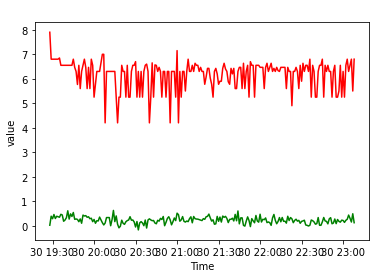

In [34]:
plt.plot(X, y, color='r', label='FanEngageScore')
plt.plot(X, z, color='g', label='sentiment')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Time")
plt.ylabel("value")
plt.title("  ")

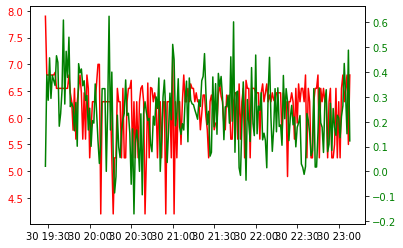

In [35]:
fig, ax = plt.subplots()

# Plot linear sequence, and set tick labels to the same color
ax.plot(X,y, color='red')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(X,z, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

In [36]:
dk = merged_dataframe

In [37]:
dk.head()

,time,Sid,HRCount,FanEngageScore,TapCounts,WaveCounts,WhistlesRedeemed,HRDeviceTypeId,Id,Retweet count,polarity_C,subjectivity,sentiment
0,2021-04-30 19:28:00,42.0,99.0,7.9,1266.0,92.0,13.0,3.0,1.390000e+18,15.762887,0.025687,0.220361,0.020619
1,2021-04-30 19:29:00,42.0,103.0,6.8,1266.0,92.0,13.0,3.0,1.390000e+18,80.097222,0.123458,0.286210,0.388889
2,2021-04-30 19:30:00,42.0,100.0,6.8,1266.0,92.0,13.0,3.0,1.390000e+18,15.608187,0.206244,0.298021,0.286550
3,2021-04-30 19:31:00,42.0,99.0,6.8,1266.0,92.0,13.0,3.0,1.390000e+18,53.882979,0.134043,0.256974,0.457447
4,2021-04-30 19:32:00,42.0,98.0,6.8,1266.0,92.0,13.0,3.0,1.390000e+18,9.964706,0.054957,0.150054,0.294118


In [38]:
df.resample('1T').pad()

,Id,Retweet count,polarity_C,subjectivity,sentiment
time,,,,,
2021-04-30 19:10:00,1.390000e+18,121.000000,0.257500,0.201667,0.500000
2021-04-30 19:11:00,1.390000e+18,40.250000,0.027699,0.225000,0.125000
2021-04-30 19:12:00,1.390000e+18,53.138889,0.145076,0.153704,0.361111
2021-04-30 19:13:00,1.390000e+18,7.111111,0.151878,0.311878,0.222222
2021-04-30 19:14:00,1.390000e+18,135.325000,0.015655,0.177827,-0.025000
...,...,...,...,...,...
2021-04-30 23:04:00,1.390000e+18,10.804348,0.210870,0.398696,0.434783
2021-04-30 23:05:00,1.390000e+18,11.728814,0.140344,0.335344,0.305085
2021-04-30 23:06:00,1.390000e+18,18.393939,0.105796,0.337867,0.151515


In [39]:
dk.to_csv('highlights1.csv')